In [1]:
import os
import numpy as np
import pandas as pd
from scipy.misc import imread
from sklearn.metrics import accuracy_score

import tensorflow as tf
import keras

C:\Users\Gurudeo\Anaconda2\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.models import Sequential

In [3]:
from keras.layers import Dense, Flatten, InputLayer,Dropout

In [4]:
import matplotlib.pyplot as plt

In [5]:
root_dir=os.path.abspath('C:/Users/Gurudeo/Desktop/Personal/Digits/')

In [6]:
data_dir = os.path.join(root_dir, 'data')


In [7]:
os.path.exists(root_dir)


True

In [8]:
os.path.exists(data_dir)


True

In [9]:
data=pd.read_csv(os.path.join(data_dir, 'Data', 'data.csv'))

In [10]:
msk = np.random.rand(len(data)) < 0.8

In [11]:
train = data[msk]
test = data[~msk]

In [12]:
train_temp = []
for img_name in train.filename:
    image_path = os.path.join(data_dir, 'Data', 'Images', 'data', img_name)
    img = imread(image_path, flatten=True)
    img = img.astype('float32')
    train_temp.append(img)
    

C:\Users\Gurudeo\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.


In [13]:
X_train=np.stack(train_temp)

In [14]:
temp = []
for img_name in test.filename:
    image_path = os.path.join(data_dir, 'Data', 'Images', 'data', img_name)
    img = imread(image_path, flatten=True)
    img = img.astype('float32')
    temp.append(img)
    

C:\Users\Gurudeo\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.


In [15]:
X_test=np.stack(train_temp)

In [16]:
X_train /= 255.0
X_train = X_train.reshape(-1, 784).astype('float32')

In [17]:
X_test /= 255.0
X_test = X_test.reshape(-1, 784).astype('float32')

In [18]:
y_train=keras.utils.np_utils.to_categorical(train.label.values)

In [19]:
y_test=keras.utils.np_utils.to_categorical(train.label.values)

In [20]:
inputs = 784
hidden1_neurons=50
hidden2_neurons=50
hidden3_neurons=50
hidden4_neurons=50
output_Units=10
epochs = 25
batch_size = 128

In [21]:
model = Sequential([
Dense(input_dim=inputs,output_dim=hidden1_neurons,activation='relu'),
Dropout(0.2),
Dense(input_dim=hidden1_neurons,output_dim=hidden2_neurons,activation='relu'),
Dropout(0.2),
Dense(input_dim=hidden2_neurons,output_dim=hidden3_neurons,activation='relu'),
Dropout(0.2),
Dense(input_dim=hidden3_neurons,output_dim=hidden4_neurons,activation='relu'),
Dropout(0.2),
Dense(input_dim=hidden4_neurons,output_dim=output_Units, activation='softmax'),
 ])

C:\Users\Gurudeo\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="relu", units=50)`
  
C:\Users\Gurudeo\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=50, activation="relu", units=50)`
  after removing the cwd from sys.path.
C:\Users\Gurudeo\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=50, activation="relu", units=50)`
  
C:\Users\Gurudeo\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=50, activation="relu", units=50)`
  
C:\Users\Gurudeo\Anaconda2\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=50, activation="softmax", units=10)`
  # Remove the CWD from sys.path while we load stuf

In [22]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [23]:
gmodel = model.fit(X_train, y_train, epochs=25, batch_size=batch_size, validation_data=(X_test, y_test))

Train on 39180 samples, validate on 39180 samples
Epoch 1/25
39180/39180 [==============================] - 8s 215us/step - loss: 0.9338 - acc: 0.6925 - val_loss: 0.2805 - val_acc: 0.9207
Epoch 2/25
39180/39180 [==============================] - 7s 184us/step - loss: 0.4058 - acc: 0.8880 - val_loss: 0.2070 - val_acc: 0.9413
Epoch 3/25
39180/39180 [==============================] - 8s 195us/step - loss: 0.3189 - acc: 0.9108 - val_loss: 0.1572 - val_acc: 0.9550
Epoch 4/25
39180/39180 [==============================] - 7s 175us/step - loss: 0.2762 - acc: 0.9231 - val_loss: 0.1409 - val_acc: 0.9596
Epoch 5/25
39180/39180 [==============================] - 5s 130us/step - loss: 0.2469 - acc: 0.9325 - val_loss: 0.1187 - val_acc: 0.9650
Epoch 6/25
39180/39180 [==============================] - 5s 117us/step - loss: 0.2200 - acc: 0.9390 - val_loss: 0.1114 - val_acc: 0.9671
Epoch 7/25
39180/39180 [==============================] - 5s 127us/step - loss: 0.2058 - acc: 0.9424 - val_loss: 0.0995 - 

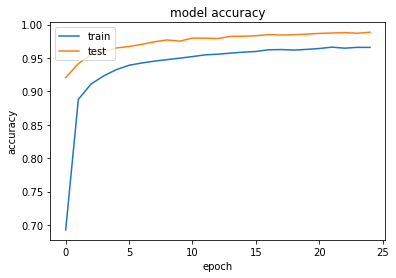

In [24]:
plt.plot(gmodel.history['acc'])
plt.plot(gmodel.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

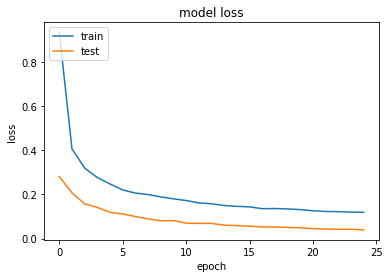

In [25]:
plt.plot(gmodel.history['loss'])
plt.plot(gmodel.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()